In [1]:
# A1 Data Exploration
import pandas as pd

xls = pd.ExcelFile('lab2.xlsx')
df1 = pd.read_excel(xls, 'thyroid0387_UCI')
df1

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  1000 non-null   int64 
 1   age                        1000 non-null   int64 
 2   sex                        1000 non-null   object
 3   on thyroxine               1000 non-null   object
 4   query on thyroxine         1000 non-null   object
 5   on antithyroid medication  1000 non-null   object
 6   sick                       1000 non-null   object
 7   pregnant                   1000 non-null   object
 8   thyroid surgery            1000 non-null   object
 9   I131 treatment             1000 non-null   object
 10  query hypothyroid          1000 non-null   object
 11  query hyperthyroid         1000 non-null   object
 12  lithium                    1000 non-null   object
 13  goitre                     1000 non-null   object
 14  tumor    

In [3]:
# presence of missing values
(df1 == '?').sum()

Record ID                      0
age                            0
sex                           24
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          115
T3 measured                    0
T3                           202
TT4 measured                   0
TT4                           40
T4U measured                   0
T4U                           98
FTI measured                   0
FTI                           98
TBG measured                   0
TBG                          964
referral source                0
Condition 

In [4]:
# cleaning the data by making it float64 from object
import numpy as np
df1.replace("?", np.nan, inplace = True)

In [5]:
# data range, presence of outliers, mean, standard deviation
df1.describe()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
count,1.000000e+03,1000.000000,885.000000,798.000000,960.000000,902.000000,902.000000,36.000000
mean,8.409340e+08,51.509000,6.559638,1.822243,106.447708,0.972040,114.600887,26.230556
std,7.628734e+04,18.776541,29.416767,0.806387,41.702870,0.206965,61.914009,8.074610
min,8.408010e+08,1.000000,0.050000,0.050000,3.000000,0.200000,2.500000,9.299999
25%,8.409031e+08,35.000000,0.200000,1.400000,84.000000,0.860000,90.250000,21.000000
50%,8.409210e+08,55.000000,0.800000,1.800000,103.000000,0.960000,106.000000,25.500000
75%,8.410111e+08,67.000000,2.000000,2.200000,124.000000,1.060000,126.000000,30.000000
max,8.410310e+08,97.000000,430.000000,8.599999,359.000000,1.860000,839.000000,53.000000


In [6]:
# A2 Data Imputation
# the attribute 'sex' is categorical data we use mode
df1['sex'].mode()

0    F
dtype: object

In [7]:
df1['sex'].replace(np.nan, "F", inplace=True)

In [8]:
# 'TSH' is numeric and it has outliers 
repl1 = df1['TSH'].median()
df1['TSH'].replace(np.nan, repl1, inplace=True)

In [9]:
# 'T3' is numeric and does not have outliers
repl2 = df1['T3'].mean()
df1['T3'].replace(np.nan, repl2, inplace=True)

In [10]:
# 'TT4' is numeric and has outliers
repl3 = df1['TT4'].median()
df1['TT4'].replace(np.nan, repl3, inplace=True)

In [11]:
# 'T4U' is numeric and has not outlier
repl4 = df1['T4U'].mean()
df1['T4U'].replace(np.nan, repl4, inplace=True)

In [12]:
# 'FTI' is numeric and has outliers
repl5 = df1['FTI'].median()
df1['FTI'].replace(np.nan, repl5, inplace=True)

In [13]:
# 'TBG' is numeric and has no outliers
repl6 = df1['TBG'].mean()
df1['TBG'].replace(np.nan, repl6, inplace=True)

In [14]:
# A3 Data Normalization
# min-max normalization on numeric attributes
# apply normalization techniques
for column in ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']:
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())    
  
# view normalized data
df1.describe()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.409340e+08,51.509000,0.013600,0.207280,0.290196,0.465084,0.133004,0.387427
std,7.628734e+04,18.776541,0.064503,0.084241,0.114789,0.118405,0.070358,0.034585
min,8.408010e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.409031e+08,35.000000,0.000465,0.169591,0.230337,0.403614,0.106993,0.387427
50%,8.409210e+08,55.000000,0.001744,0.207280,0.280899,0.465084,0.123730,0.387427
75%,8.410111e+08,67.000000,0.003838,0.239766,0.334270,0.512048,0.144053,0.387427
max,8.410310e+08,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df1.replace("f", False, inplace=True)
df1.replace("t", True, inplace=True)

In [16]:
# A4 Similarity Measure
df1_temp = df1
df1_bool = df1_temp.select_dtypes('bool')
df1_bool.insert(0, 'sex', df1_temp['sex'].tolist(), True)
df1_bool['sex'].replace("M", False, inplace=True)
df1_bool['sex'].replace("F", True, inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
def return_11(l1, l2):
    temp = []
    for i in range(len(l1)):
        temp.append(l1[i] and l2[i])
    cnt = temp.count(True)
    return cnt
    
def return_00(l1, l2):
    temp = []
    for i in range(len(l1)):
        temp.append(not l1[i] and not l2[i])
    cnt = temp.count(True)
    return cnt
    
def jaccard_coefficient(l1, l2):
    f_00 = return_00(l1, l2)
    f_11 = return_11(l1, l2)
    num = f_11
    den = len(x1) - f_00
    return (num / den)

def SMC(l1, l2):
    f_00 = return_00(l1, l2)
    f_11 = return_11(l1, l2)
    num = f_11 + f_00
    den = len(x1)
    return (num / den)

x1 = df1_bool.iloc[0].tolist()
x2 = df1_bool.iloc[1].tolist()

print("Jaccard Index: ", jaccard_coefficient(x1, x2), " SMC: ", SMC(x1, x2))

Jaccard Index:  0.4  SMC:  0.8571428571428571


In [18]:
# A5 Cosine Similiarity Measure

df1_simil = df1.iloc[:,2:29]
df1_simil.replace(True, 1, inplace=True)
df1_simil.replace(False, 0, inplace=True)
df1_simil['sex'].replace("M", 0, inplace=True)
df1_simil['sex'].replace("F", 1, inplace=True)

In [19]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(A, B):
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    return cosine

y1 = df1_simil.iloc[0].to_numpy()
y2 = df1_simil.iloc[1].to_numpy()

cosine_similarity(y1, y2)

0.6323327261959172

<AxesSubplot:>

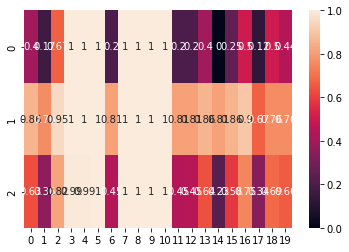

In [20]:
# A6 Heatmap Plot
import seaborn as sns

jc = []
smc = []
cos = []

for i in range(20):
    jc.append(jaccard_coefficient(df1_bool.iloc[i].tolist(), df1_bool.iloc[i + 1].tolist()))
    smc.append(SMC(df1_bool.iloc[i].tolist(), df1_bool.iloc[i + 1].tolist()))
    cos.append(cosine_similarity(df1_simil.iloc[i].tolist(), df1_simil.iloc[i + 1].tolist()))

data = [jc, smc, cos]
sns.heatmap(data, annot = True)